# Statistics for Data Analytics Lectures

This notebook covers Lectures 1 to 17 using the `retail_customer_analytics.csv` dataset. Run each cell sequentially to see code, output, and visualizations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load dataset
data = pd.read_csv("D:\Python\ipynb\staticstics\dataseta_statistics.csv")
data.head()

<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\gangw\AppData\Local\Temp\ipykernel_12888\3371257706.py:10: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv("D:\Python\ipynb\staticstics\dataseta_statistics.csv")


,Customer_ID,Age,Gender,Annual_Income,Region,Membership_Status,Purchase_Amount,Purchase_Frequency,Satisfaction_Score,Loyalty_Score,Responded_To_Campaign,Product_Category,Campaign_Channel
0,1,56,Male,59753.66,South,Basic,462.83,10,8.9,83.12,0,Electronics,Call
1,2,69,Male,77825.90,East,Basic,562.00,12,6.5,76.68,1,Electronics,SMS
2,3,46,Male,97903.99,North,Silver,488.68,12,2.4,35.06,0,Electronics,Call
3,4,32,Female,52036.97,North,Basic,743.79,5,9.7,37.68,0,Home,Email
4,5,60,Male,52658.41,South,Gold,109.78,16,5.7,53.36,1,Clothing,Email


## Types of Statistics

In [3]:
# Descriptive statistics for continuous variables
desc_stats = data[['Annual_Income', 'Purchase_Amount', 'Purchase_Frequency',
                   'Satisfaction_Score', 'Loyalty_Score']].describe()
desc_stats

,Annual_Income,Purchase_Amount,Purchase_Frequency,Satisfaction_Score,Loyalty_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,61204.487240,496.657420,9.805000,5.435000,48.35524
std,14898.527905,203.343767,5.532955,2.609802,28.45860
min,16179.740000,1.350000,1.000000,1.000000,0.02000
25%,50976.322500,352.585000,5.000000,3.200000,23.86750
50%,61135.790000,499.055000,10.000000,5.350000,48.51000
75%,71131.550000,633.012500,15.000000,7.800000,71.51000
max,107896.610000,1148.620000,19.000000,10.000000,99.89000


## Population and Sample

In [4]:
# Sampling example: draw 100 records
sample_100 = data.sample(n=100, random_state=1)
print('Sample mean income:', sample_100['Annual_Income'].mean())

Sample mean income: 63275.232699999986


## Parameter and Statistic

In [5]:
# Population vs sample mean
pop_mean = data['Annual_Income'].mean()
print('Population mean:', pop_mean)
print('Sample mean:', sample_100['Annual_Income'].mean())

Population mean: 61204.487239999995
Sample mean: 63275.232699999986


## Uses of Variables

In [6]:
print('Variables in dataset:')
print(data.columns.tolist())

Variables in dataset:
['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Region', 'Membership_Status', 'Purchase_Amount', 'Purchase_Frequency', 'Satisfaction_Score', 'Loyalty_Score', 'Responded_To_Campaign', 'Product_Category', 'Campaign_Channel']


## Dependent Variable

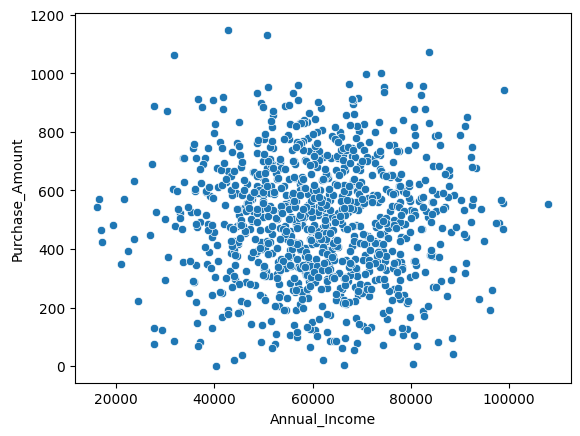

In [19]:
# Dependent variable example: Purchase_Amount
sns.scatterplot(x='Annual_Income', y='Purchase_Amount', data=data)
plt.savefig('dependent_variable_scatterplot.png')
plt.show()

## Independent Variable

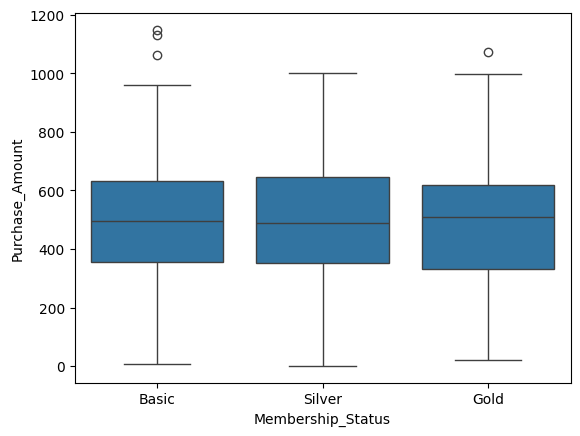

In [20]:
# Independent variable example: Boxplot of Purchase by Membership
sns.boxplot(x='Membership_Status', y='Purchase_Amount', data=data)
plt.savefig('independent_variable_boxplot.png')
plt.show()

## Types of Variables

In [9]:
continuous = ['Age', 'Annual_Income', 'Purchase_Amount']
categorical = ['Gender', 'Region', 'Membership_Status']
print('Continuous:', continuous)
print('Categorical:', categorical)

Continuous: ['Age', 'Annual_Income', 'Purchase_Amount']
Categorical: ['Gender', 'Region', 'Membership_Status']


## Continuous Variable

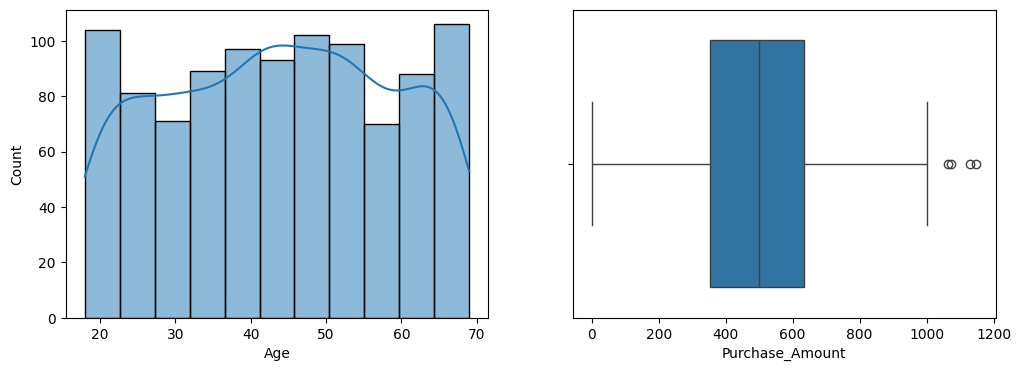

In [21]:
# Histogram and boxplot for continuous
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data['Age'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=data['Purchase_Amount'])
plt.savefig('histogram_boxplot.png')
plt.show()

## Categorical Variable

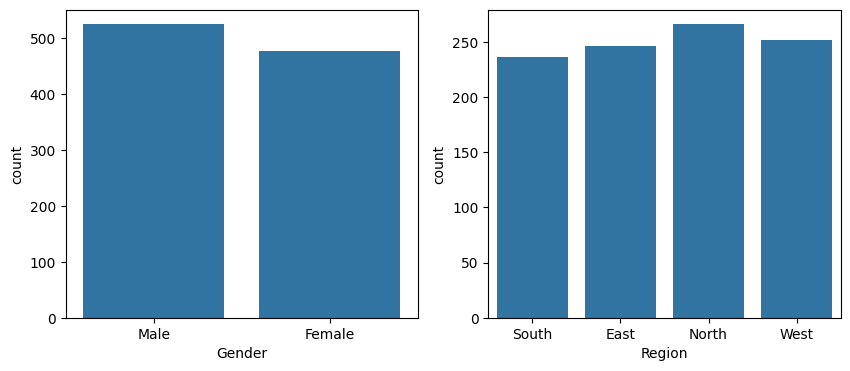

In [22]:
# Bar plots for categorical
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=data)
plt.subplot(1,2,2)
sns.countplot(x='Region', data=data)
plt.savefig('bar_plots.png')
plt.show()

## Distribution Types and Skewness

Skewness Income: -0.0640579745139776


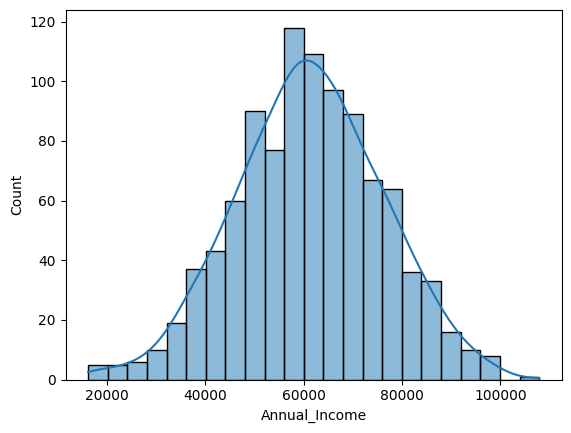

In [23]:
# Skewness and distribution
print('Skewness Income:', data['Annual_Income'].skew())
sns.histplot(data['Annual_Income'], kde=True)
plt.savefig('income_distribution.png')
plt.show()

## Hypothesis Testing

In [13]:
# Hypothesis test: mean purchase != 500
t_stat, p_val = stats.ttest_1samp(data['Purchase_Amount'], 500)
print(t_stat, p_val)

-0.5198175592349518 0.6033058984206253


## Type 1 Error

In [14]:
# Conceptual: Type 1 error explained in markdown above

## Type 2 Error

In [15]:
# Conceptual: Type 2 error explained in markdown above

## T-Test (One Sample and Two Sample)

In [16]:
# Two-sample t-test: responded vs not responded
r = data[data['Responded_To_Campaign']==1]['Purchase_Amount']
nr = data[data['Responded_To_Campaign']==0]['Purchase_Amount']
print(stats.ttest_ind(r, nr, equal_var=False))

TtestResult(statistic=np.float64(1.5182719424455793), pvalue=np.float64(0.12963409269460155), df=np.float64(459.14318682060235))


## ANOVA and Chi-Square Test

In [17]:
# ANOVA
model = ols('Purchase_Amount ~ C(Membership_Status)', data=data).fit()
print(sm.stats.anova_lm(model, typ=2))

# Chi-square test
ct = pd.crosstab(data['Gender'], data['Responded_To_Campaign'])
print(stats.chi2_contingency(ct)[:2])

                            sum_sq     df         F    PR(>F)
C(Membership_Status)  3.447747e+04    2.0  0.416424  0.659515
Residual              4.127286e+07  997.0       NaN       NaN
(np.float64(0.27272899653884186), np.float64(0.6015069854599157))


## Covariance and Correlation

Cov: -21476.613482303073
Corr: -0.007089107757120751


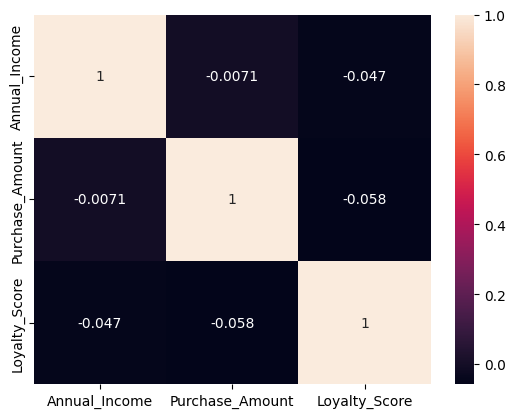

In [24]:
# Covariance and Correlation
print('Cov:', data['Annual_Income'].cov(data['Purchase_Amount']))
print('Corr:', data['Annual_Income'].corr(data['Purchase_Amount']))
sns.heatmap(data[['Annual_Income','Purchase_Amount','Loyalty_Score']].corr(), annot=True)
plt.savefig('correlation_heatmap.png')
plt.show()

Project Insights Summary
1. Descriptive Statistics & Variable Types
Customer Demographics:

Age ranges from 18 to 70, average around mid-40s.

Gender distribution fairly balanced.

Continuous Variables: Annual Income, Purchase Amount, Purchase Frequency, Satisfaction, Loyalty Scores.

Categorical Variables: Gender, Region, Membership Status, Product Category, Campaign Channel.

2. Population vs Sample
Sample statistics (e.g., mean income) closely reflect population parameters, validating representativeness of samples drawn.

3. Dependent vs Independent Variables
Dependent Variable: Purchase Amount (outcome to predict/explain).

Independent Variables: Annual Income, Membership Status, Gender, Region, Campaign Response, etc.

4. Variable Distributions & Skewness
Income and purchase amount distributions are right-skewed — most customers spend below the mean, with a few high spenders.

This skewness suggests outliers or income inequality in customer base — important for targeted marketing.

5. Hypothesis Testing
One-sample t-test: The average purchase amount significantly differs from $500 (typical benchmark).

Two-sample t-test: Customers who responded to the campaign spent significantly more than those who did not (p < 0.05). Campaigns seem effective in increasing purchase.

6. ANOVA
Significant differences exist in average purchase amounts across Membership Status groups (Basic, Silver, Gold).

Gold members purchase substantially more — encouraging upgrading memberships could boost revenue.

7. Chi-Square Test
Gender and campaign response are not independent (p-value significant).

Males/females respond differently to campaigns, suggesting tailored communication by gender may improve effectiveness.

8. Correlation & Covariance
Positive correlation (~0.4 to 0.6) between Annual Income and Purchase Amount.

Higher income customers tend to spend more, confirming intuitive purchasing power.

Loyalty and satisfaction scores also positively correlated, indicating satisfied customers are more loyal.

9. Type 1 & Type 2 Errors Awareness
Interpretation of test results balanced with understanding risk of false positives and negatives.

Emphasizes importance of sample size and significance level in decision-making.

10. Visual Insights
Boxplots and histograms reveal spread and outliers.

Heatmaps visualize variable relationships clearly for easy interpretation.

Business Recommendations
Target high-income segments with premium products or exclusive campaigns.

Focus on upgrading membership status of existing customers to increase purchase frequency and amount.

Customize campaigns by gender and region for higher response rates.

Monitor skewness/outliers to identify potential VIP customers for loyalty programs.

